In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from collections import Counter
import re
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab/딥러닝분석/Hotel_reviews_20k.csv', sep=',', encoding='utf-8')
df = df.iloc[:, :2]
df.head()

rating_review                                        review_full
0              5  Been going to honk for quite a while . This ma...
1              1  We have been a frequent visitor at this chain ...
2              5  Excellent staff, very cooperative and gentle ....
3              4  I have always visit this place.they always off...
4              5  Lot of appraise about Chef Deepak Chef Wangmo ...

In [ ]:
# 리뷰와 평점 데이터 추출
reviews = df['review_full']
ratings = df['rating_review']

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 영어 전처리를 위한 불용어(stopwords) 다운로드
nltk.download('stopwords')

# 영어 전처리를 위한 토큰화 도구 다운로드
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 리뷰 텍스트 전처리 및 단어 추출
def preprocess_text(string):
    string = re.sub(r'[^a-zA-Z\s]', '', string.lower())  # 영어 이외의 문자 제거 및 소문자 변환
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
    tokens = word_tokenize(string)  # 토큰화
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]  # 불용어 제거
    return filtered_tokens

reviews = reviews.apply(preprocess_text)


In [ ]:
# 좋은 호텔 리뷰와 나쁜 호텔 리뷰 분리
good_reviews = reviews[ratings >= 4]
bad_reviews = reviews[ratings <= 2]


In [ ]:
# 단어 빈도수 계산
good_words = [word for review in good_reviews for word in review]
bad_words = [word for review in bad_reviews for word in review]

good_word_counts = Counter(good_words)
bad_word_counts = Counter(bad_words)


In [ ]:
# 좋은 단어와 나쁜 단어의 중복 제거
common_words = set(good_word_counts.keys()).intersection(set(bad_word_counts.keys()))

for word in common_words:
    del good_word_counts[word]
    del bad_word_counts[word]

# 상위 10개의 단어 출력
print("좋은 호텔 리뷰에서 많이 사용되는 단어:")
for word, count in good_word_counts.most_common(50):
    print(word, count)-

print("\n나쁜 호텔 리뷰에서 많이 사용되는 단어:")
for word, count in bad_word_counts.most_common(10):
    print(word, count)

좋은 호텔 리뷰에서 많이 사용되는 단어:
ambika 146
rahul 96
kohli 74
rattan 71
governor 70
amolak 70
nyc 70
favourites 66
ms 65
quoin 59

나쁜 호텔 리뷰에서 많이 사용되는 단어:
unprofessional 38
inedible 25
unhygienic 25
poisoning 20
refund 18
arguing 17
unfriendly 15
rotten 14
unacceptable 14
excuses 14


In [ ]:
# 상위 10개의 단어 출력
print("좋은 호텔 리뷰에서 많이 사용되는 단어:")
for word, count in good_word_counts.most_common(50):
    print(word, count)

좋은 호텔 리뷰에서 많이 사용되는 단어:
ambika 146
rahul 96
kohli 74
rattan 71
governor 70
amolak 70
nyc 70
favourites 66
ms 65
quoin 59
pastas 59
kanchan 58
opportunity 50
blu 49
kashmiri 49
shivam 48
gorgeous 47
unforgettable 46
kitkat 45
guppy 43
wasabi 43
sorrento 42
renu 40
manor 39
karnataka 38
curated 38
vibrant 37
pullman 36
chettinad 36
sunil 36
yumm 36
papaya 35
undoubtedly 35
wholesome 35
bouche 35
phenomenal 34
serene 34
region 34
patta 33
rasmalai 33
tradition 33
santosh 33
novotel 32
taster 32
jamavar 32
akash 31
orient 30
sumit 30
thanx 29
pumpkin 29


In [ ]:
print("\n나쁜 호텔 리뷰에서 많이 사용되는 단어:")
for word, count in bad_word_counts.most_common(50):
    print(word, count)


나쁜 호텔 리뷰에서 많이 사용되는 단어:
unprofessional 38
inedible 25
unhygienic 25
poisoning 20
refund 18
arguing 17
unfriendly 15
rotten 14
unacceptable 14
excuses 14
stinking 14
apology 14
hopeless 12
discourteous 12
fridge 12
unavailable 11
untrained 11
reheated 11
cheating 10
embarrassed 10
clueless 10
receipt 10
bouncers 10
anager 10
euros 9
argued 9
insulted 9
downright 9
disrespectful 8
bouncer 8
audacity 8
shoddy 8
questioned 8
shameful 8
imperfecto 8
apologise 8
mkt 8
miserable 7
invoice 7
chacha 7
phones 7
grossly 7
pissed 7
beg 7
meanwhile 7
enquire 7
confronted 7
unhelpful 7
handing 7
insect 7


In [ ]:
word_tokens_com = list(comment_["info"])
word_tokens_com = sum(word_tokens_com, [])
total_words_com = []

for w in word_tokens_com:
    if w not in stop_words:
        total_words_com.append(w)

result_words_com = ' '.join(total_words_com)


In [ ]:
good_words

['going',
 'honk',
 'quite',
 'man',
 'falesh',
 'always',
 'top',
 'job',
 'making',
 'beautiful',
 'cocktails',
 'perfection',
 'advising',
 'best',
 'delicacies',
 'always',
 'remarkable',
 'gr',
 'job',
 'falesh',
 'keep',
 'sahil',
 'bhalla',
 'excellent',
 'staff',
 'cooperative',
 'gentle',
 'specially',
 'amit',
 'helpful',
 'hardworking',
 'keep',
 'amit',
 'thyme',
 'always',
 'visit',
 'place',
 'always',
 'offer',
 'good',
 'food',
 'one',
 'thing',
 'hate',
 'place',
 'long',
 'ques',
 'lunch',
 'dinner',
 'time',
 'get',
 'entry',
 'chance',
 'go',
 'odd',
 'time',
 'enjoy',
 'awesome',
 'south',
 'indian',
 'cuisine',
 'lot',
 'appraise',
 'chef',
 'deepak',
 'chef',
 'wangmo',
 'service',
 'staff',
 'ajay',
 'harish',
 'manoj',
 'hotel',
 'good',
 'excellent',
 'ambience',
 'also',
 'staff',
 'generous',
 'loved',
 'experience',
 'would',
 'definitely',
 'go',
 'occasions',
 'fantastic',
 'snacks',
 'tea',
 'available',
 'balle',
 'balle',
 'restaurant',
 'nice',
 'plac

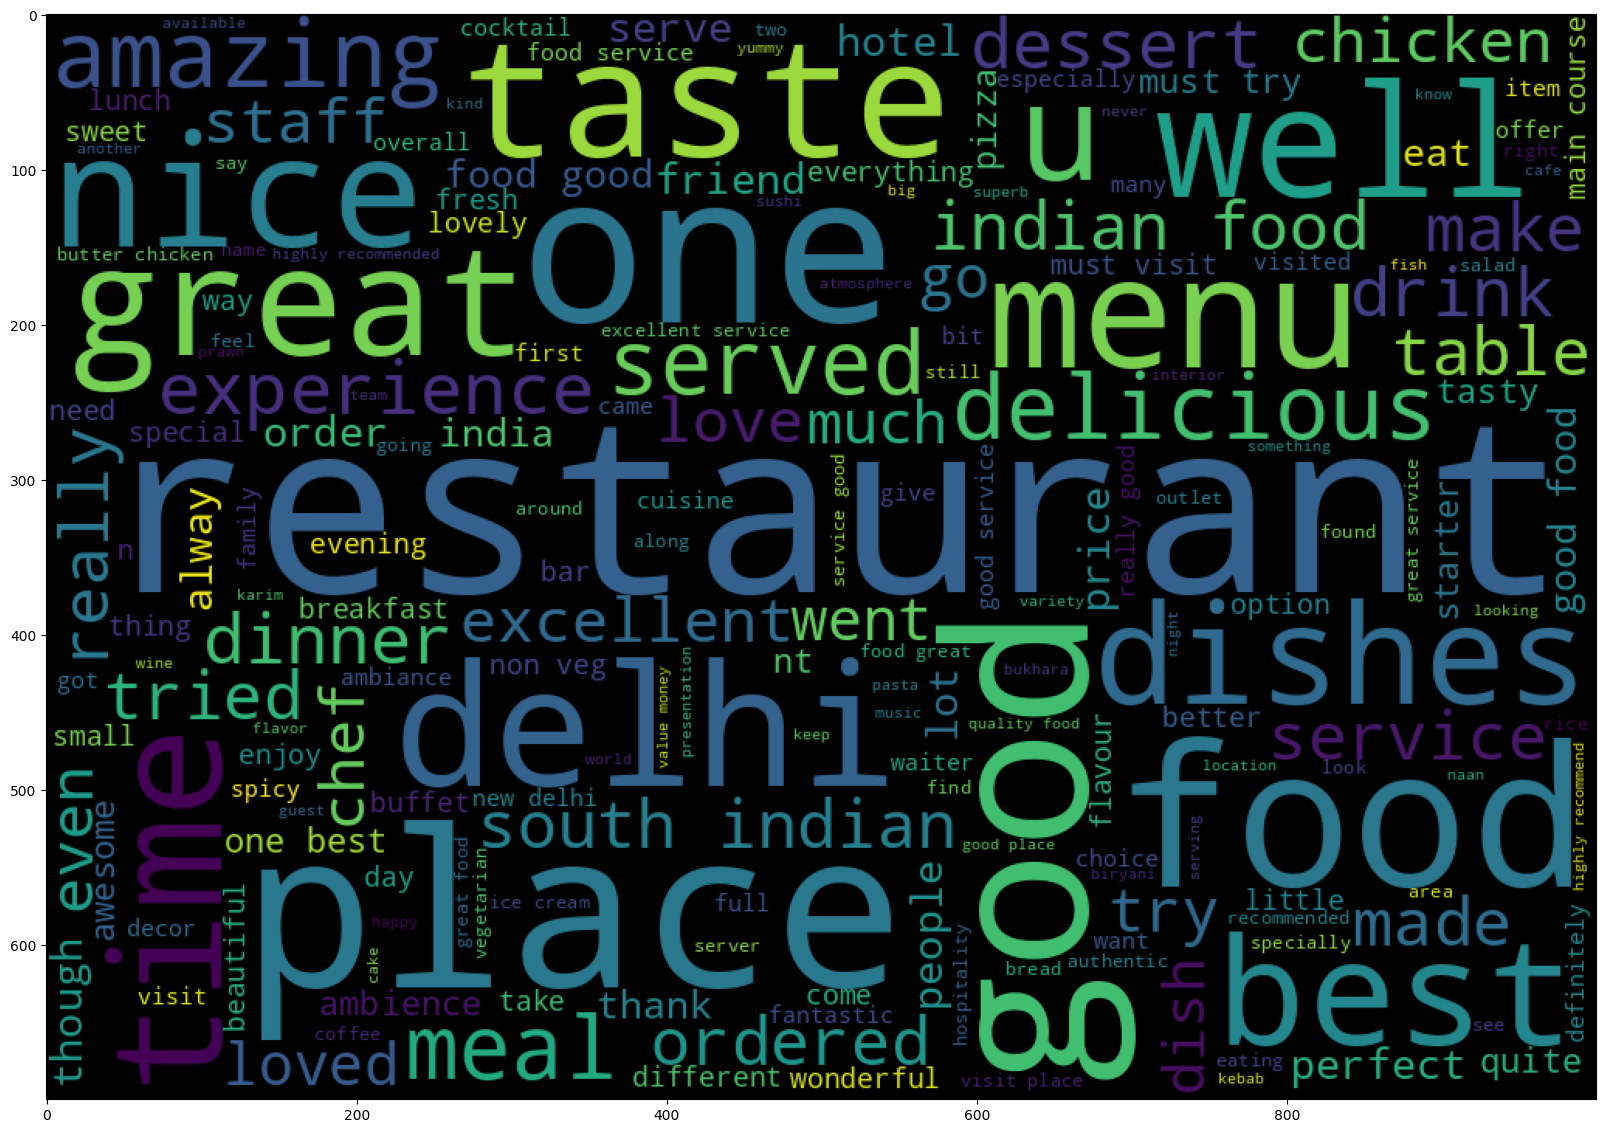

In [ ]:
good_words = ' '.join(good_words)
wcloud_com = WordCloud(width = 1000, height = 700).generate(good_words)

plt.figure(figsize = (20,20))
plt.imshow(wcloud_com)

In [ ]:
good_words

'going honk quite man falesh always top job making beautiful cocktails perfection advising best delicacies always remarkable gr job falesh keep sahil bhalla excellent staff cooperative gentle specially amit helpful hardworking keep amit thyme always visit place always offer good food one thing hate place long ques lunch dinner time get entry chance go odd time enjoy awesome south indian cuisine lot appraise chef deepak chef wangmo service staff ajay harish manoj hotel good excellent ambience also staff generous loved experience would definitely go occasions fantastic snacks tea available balle balle restaurant nice place sit enjoy tea small restaurant expertised chinese food items pasta white sauce crispy potato chilly worth tasty visited place take away ordered paneer paronthas dal makhni dishes tasty true dhaba style oozing goodness butter rates quite reasonable get good value money jamun one places always recommended one best places delhi ncr authentic luxury indian dining experienc

In [ ]:
bad_words = [word for review in bad_reviews for word in review]


In [ ]:
bad_words

'frequent visitor chain years sad restaurant decline seems management completely indifferent unfortunate experience lunch afternoon service poor servers nt bother listen requests ordered non spicy vegetarian dish parents nt eat spicy food dish came different sauce loaded spices server requested accept dish refused could immediately see displeasure overall food average nothing feel good chicken dish tasted stale nt waste money special day people knew spoil manager extremely rude really needs learn professional pre booked table prices celebrations already negotiated manager refused time payment serving staff also seems lazy take forever serve good thing restaurant ambiance food ok value money going la carte never visiting place order dumplings starters might content main courses abomination old smelly red snapper tough chewy lamb disjointed overly sweet sauces perhaps menu simply extended cook staff prepare effectively service spotty times surly noisy shrill seating area due choice floor

In [ ]:
bad_words

'frequent visitor chain years sad restaurant decline seems management completely indifferent unfortunate experience lunch afternoon service poor servers nt bother listen requests ordered non spicy vegetarian dish parents nt eat spicy food dish came different sauce loaded spices server requested accept dish refused could immediately see displeasure overall food average nothing feel good chicken dish tasted stale nt waste money special day people knew spoil manager extremely rude really needs learn professional pre booked table prices celebrations already negotiated manager refused time payment serving staff also seems lazy take forever serve good thing restaurant ambiance food ok value money going la carte never visiting place order dumplings starters might content main courses abomination old smelly red snapper tough chewy lamb disjointed overly sweet sauces perhaps menu simply extended cook staff prepare effectively service spotty times surly noisy shrill seating area due choice floor

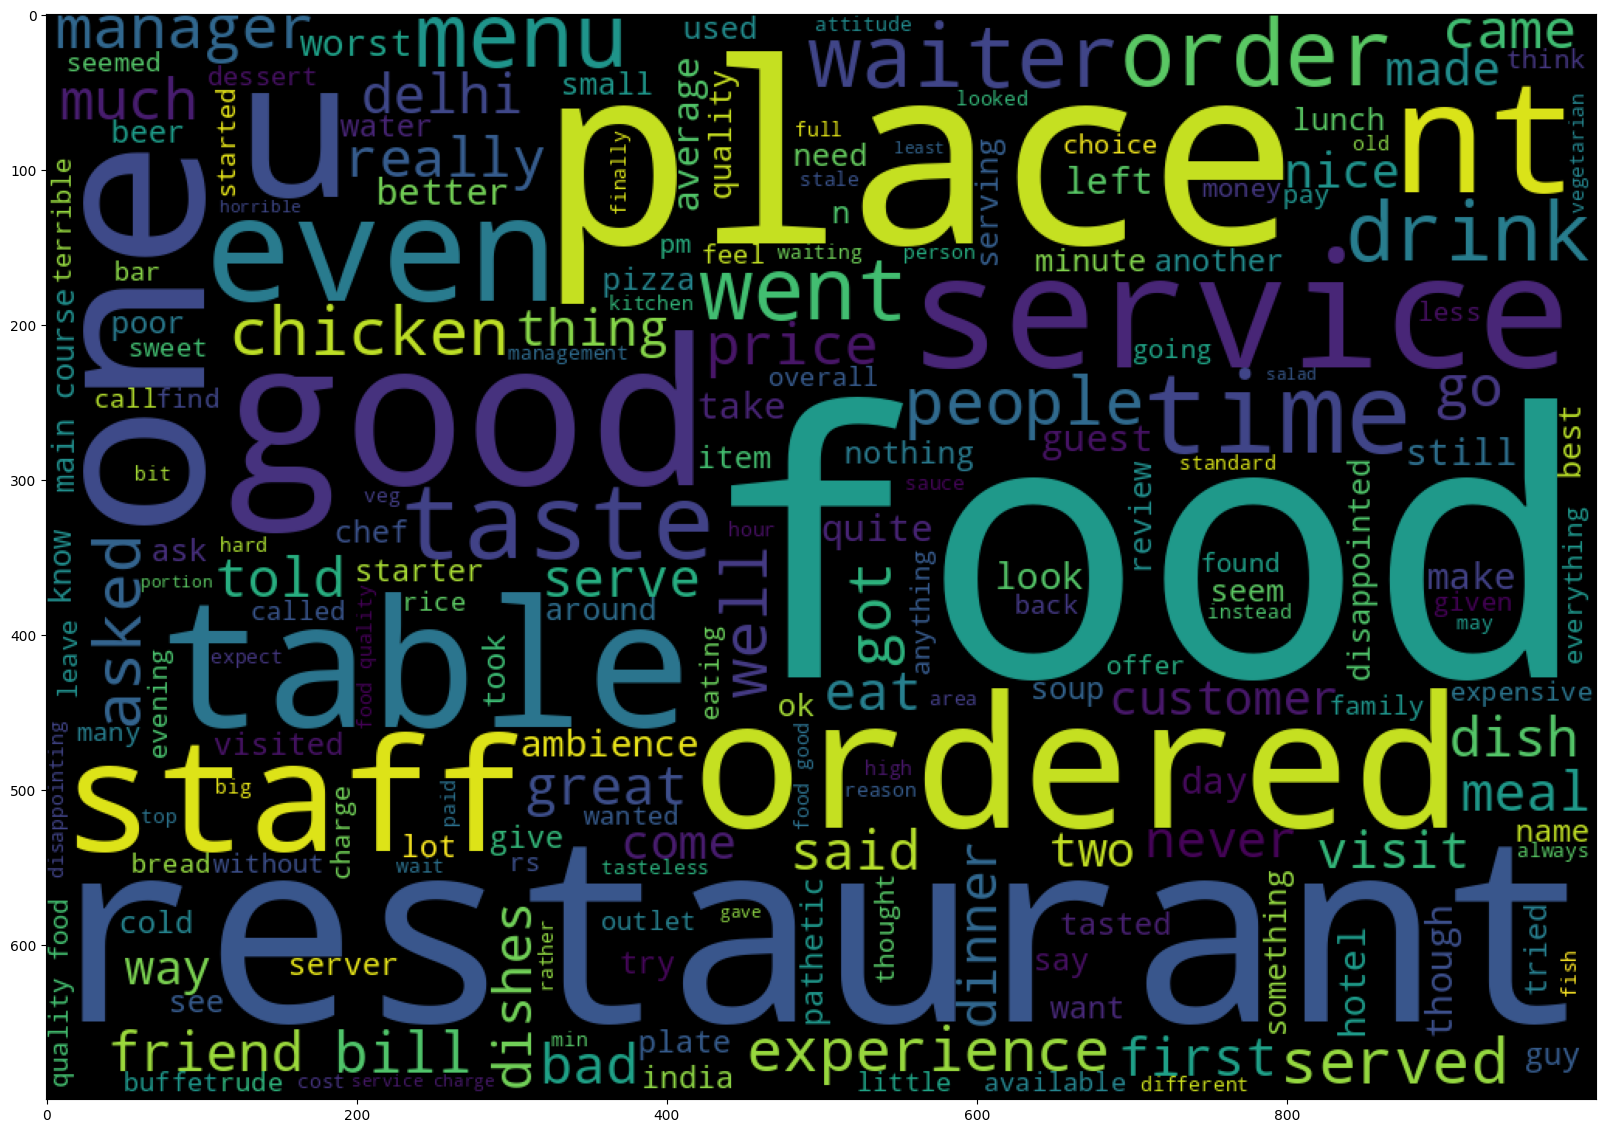

In [ ]:
bad_words = ' '.join(bad_words)

wcloud_com1 = WordCloud(width = 1000, height = 700).generate(bad_words)

plt.figure(figsize = (20,20))
plt.imshow(wcloud_com1)

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

In [ ]:
type(good_words)

list